In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

In [2]:
left = Image.open("resources/eye1.png")
right = Image.open("resources/eye2.png")

left_flat = np.array(left).flatten()
left_flat = left_flat - np.mean(left_flat)
right_flat = np.array(right).flatten()
right_flat = right_flat - np.mean(right_flat)

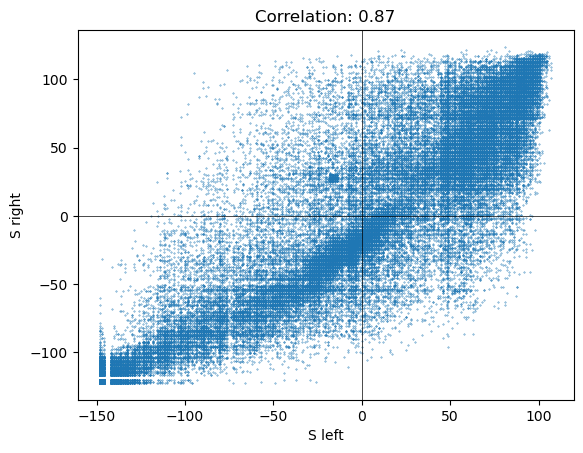

In [3]:
plt.scatter(left_flat, right_flat, s = 0.1)
plt.axhline(y = 0, color = "black", linewidth = 0.5)
plt.axvline(x = 0, color = "black", linewidth = 0.5)
plt.xlabel("S left")
plt.ylabel("S right")
plt.title(f"Correlation: {round(np.corrcoef(left_flat, right_flat)[1][0], 2)}")
plt.show()

In [4]:
theta = math.radians(45)
k_o = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
s_matrix = np.array([left_flat, right_flat])

s_decorrelated = np.matmul(k_o, s_matrix)

s_plus = s_decorrelated[0, :]
s_minus = s_decorrelated[1, :]

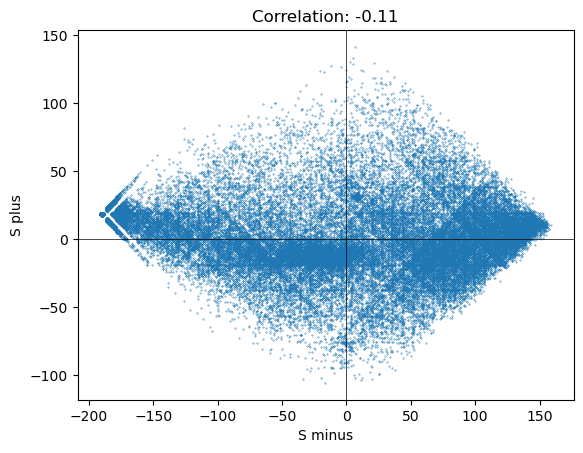

In [5]:
plt.scatter(s_plus, s_minus, s = 0.1)
plt.axhline(y = 0, color = "black", linewidth = 0.5)
plt.axvline(x = 0, color = "black", linewidth = 0.5)
plt.xlabel("S minus")
plt.ylabel("S plus")
plt.title(f"Correlation: {round(np.corrcoef(s_plus, s_minus)[1][0], 2)}")
plt.show()

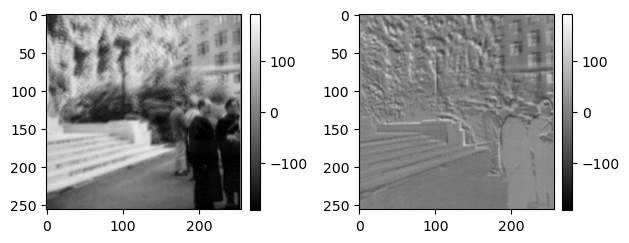

In [6]:
max_lim = np.max(np.abs([s_plus, s_minus]))

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(s_plus, np.array(left).shape), cmap = "gray", vmin = -max_lim, vmax = max_lim)
plt.colorbar(fraction = 0.046, pad = 0.04)

plt.subplot(1, 2, 2)
plt.imshow(np.reshape(s_minus, np.array(right).shape), cmap = "gray", vmin = -max_lim, vmax = max_lim)
plt.colorbar(fraction = 0.046, pad = 0.04)

plt.tight_layout()
plt.show()

In [7]:
def entropy(x, step = 1):
    counts = np.histogram(
        x,
        bins = np.linspace(np.min(s_plus) - 1, np.max(s_plus) + 1,
                           num = round((np.max(s_plus) - np.min(s_plus)) / step + 1))
    )[0]
    ps = counts / np.sum(counts)
    return -np.sum([p * np.log2(p) if p > 0 else 0 for p in ps])

In [8]:
print(f"Entropy in S+: {entropy(s_plus)}")  # 8.2
print(f"Entropy in S-: {entropy(s_minus)}")  # 6.5

Entropy in S+: 8.194632613732637
Entropy in S-: 6.508521336173317


In [9]:
g_plus = 1 / np.std(s_plus)
g_minus = 1 / np.std(s_minus)

rescale_factor = 1.1 / g_minus

g_minus = g_minus * rescale_factor
g_plus = g_plus * rescale_factor

In [10]:
assert round(np.var(s_plus * g_plus), 2) == round(np.var(s_minus * g_minus), 2)
assert g_plus < 1
assert g_minus > 1

In [11]:
max_lim = np.max(np.abs([s_minus * g_minus, s_plus * g_plus]))

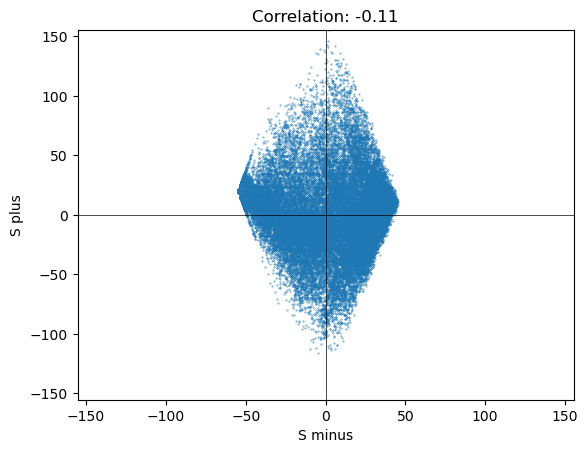

In [12]:
plt.scatter(s_plus * g_plus, s_minus * g_minus, s = 0.1)
plt.axhline(y = 0, color = "black", linewidth = 0.5)
plt.axvline(x = 0, color = "black", linewidth = 0.5)
plt.xlabel("S minus")
plt.ylabel("S plus")
plt.title(f"Correlation: {round(np.corrcoef(s_plus * g_plus, s_minus * g_minus)[1][0], 2)}")
plt.xlim(-max_lim, max_lim)
plt.ylim(-max_lim, max_lim)
plt.show()

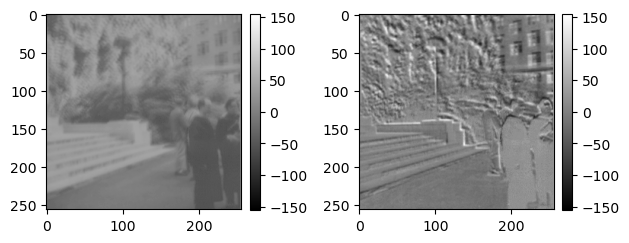

In [13]:
max_lim = np.max(np.abs([s_plus * g_plus, s_minus * g_minus]))

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(s_plus * g_plus, np.array(left).shape), cmap = "gray", vmin = -max_lim, vmax = max_lim)
plt.colorbar(fraction = 0.046, pad = 0.04)

plt.subplot(1, 2, 2)
plt.imshow(np.reshape(s_minus * g_minus, np.array(right).shape), cmap = "gray", vmin = -max_lim, vmax = max_lim)
plt.colorbar(fraction = 0.046, pad = 0.04)

plt.tight_layout()
plt.show()

In [14]:
u = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
s_matrix = np.array([s_plus * g_plus, s_minus * g_minus])

o = np.matmul(u, s_matrix)

o_1 = o[ 0, : ]
o_2 = o[ 1, : ]

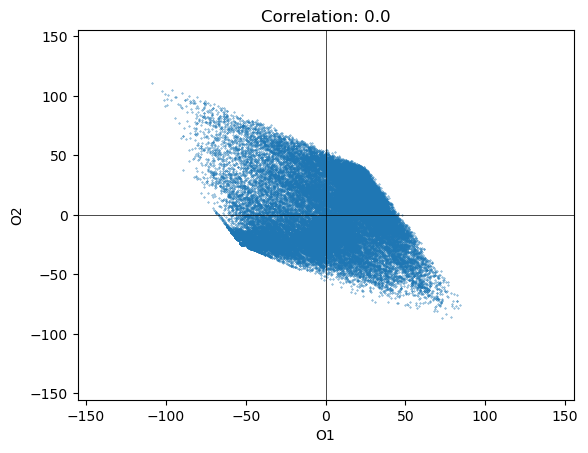

In [15]:
plt.scatter(o_1, o_2, s = 0.1)
plt.axhline(y = 0, color = "black", linewidth = 0.5)
plt.axvline(x = 0, color = "black", linewidth = 0.5)
plt.xlabel("O1")
plt.ylabel("O2")
plt.title(f"Correlation: {round(np.corrcoef(o_1, o_2)[1][0], 2)}")
plt.xlim(-max_lim, max_lim)
plt.ylim(-max_lim, max_lim)
plt.show()

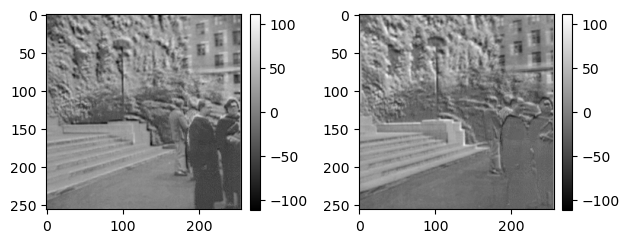

In [16]:
max_lim = np.max(np.abs([o_1, o_2]))

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(o_1, np.array(left).shape), cmap = "gray", vmin = -max_lim, vmax = max_lim)
plt.colorbar(fraction = 0.046, pad = 0.04)

plt.subplot(1, 2, 2)
plt.imshow(np.reshape(o_2, np.array(right).shape), cmap = "gray", vmin = -max_lim, vmax = max_lim)
plt.colorbar(fraction = 0.046, pad = 0.04)

plt.tight_layout()
plt.show()